In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical

In [2]:
#!pip install pydot

In [3]:
#!pip uninstall tensorflow==2.15.0

In [4]:
#!pip install tensorflow==2.16.0rc0

In [5]:
# Update Keras using pip within Jupyter Notebook
#!pip install --upgrade keras


In [6]:
#!pip install --upgrade keras

In [7]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [8]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
X_train_digit.shape

(60000, 28, 28)

In [10]:
X_train_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_train_digit.shape

(60000,)

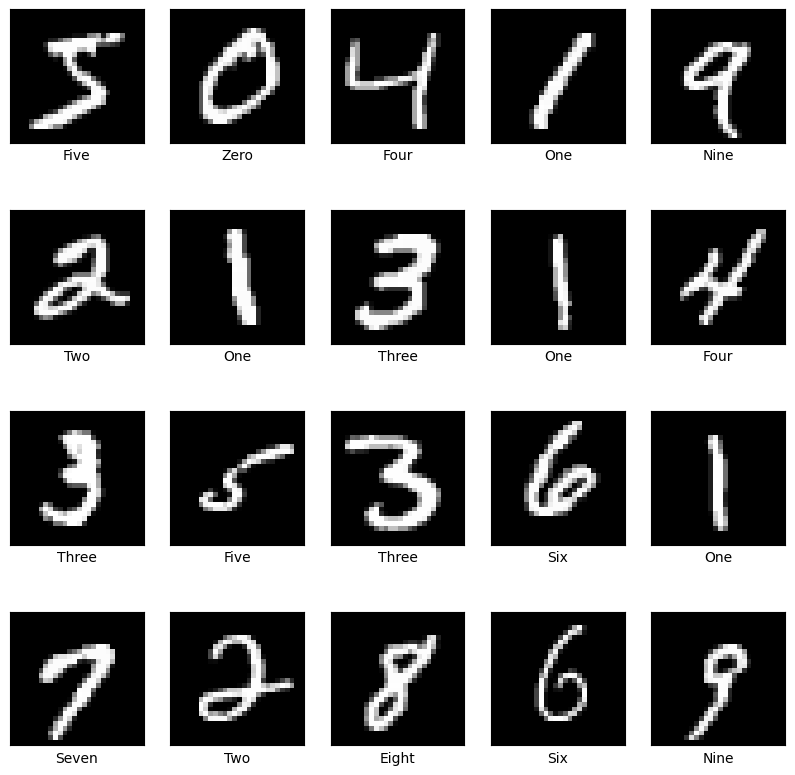

In [13]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [14]:
X_train_digit.shape

(60000, 28, 28)

In [15]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [16]:
X_train_digit.shape

(60000, 784)

In [17]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train_digit.shape

(60000,)

In [19]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
y_test_digit.shape

(10000,)

In [21]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [22]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
y_test_digit[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [27]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=20,validation_data=(X_test_digit, y_test_digit))

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7706 - loss: 4.1983 - val_accuracy: 0.9139 - val_loss: 0.3410
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9256 - loss: 0.2833 - val_accuracy: 0.9393 - val_loss: 0.2329
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9479 - loss: 0.1849 - val_accuracy: 0.9463 - val_loss: 0.2139
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9555 - loss: 0.1565 - val_accuracy: 0.9538 - val_loss: 0.1754
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9642 - loss: 0.1222 - val_accuracy: 0.9520 - val_loss: 0.1876
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9698 - loss: 0.1028 - val_accuracy: 0.9561 - val_loss: 0.1706
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9716 - loss: 0.0965 - val_accuracy: 0.9572 - val_loss: 0.1538
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9753 - loss: 0.0831 - val_accuracy

In [28]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
y_predict

array([[1.5944156e-07, 6.1148930e-01, 2.6785469e-01, ..., 9.9999970e-01,
        2.5662479e-07, 7.8674734e-01],
       [9.9986655e-01, 9.9999774e-01, 1.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.2287116e-02],
       [2.2155575e-03, 9.9999911e-01, 1.1898634e-03, ..., 2.1234911e-02,
        1.2604012e-03, 3.0194126e-08],
       ...,
       [9.8968136e-01, 4.0027356e-08, 5.6287718e-01, ..., 5.1816642e-02,
        2.4888251e-02, 9.9983585e-01],
       [1.0000000e+00, 9.9930447e-01, 9.9999994e-01, ..., 1.5572021e-02,
        1.0000000e+00, 7.9345834e-01],
       [7.9017204e-01, 2.4845386e-09, 5.9612934e-04, ..., 5.2052629e-10,
        1.5529669e-03, 4.3779869e-07]], dtype=float32)

In [30]:
y_predict[0]

array([1.5944156e-07, 6.1148930e-01, 2.6785469e-01, 3.0717494e-03,
       5.2091694e-01, 2.3393251e-01, 4.3201293e-08, 9.9999970e-01,
       2.5662479e-07, 7.8674734e-01], dtype=float32)

In [31]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector


In [32]:
y_predicts

array([7, 2, 1, ..., 4, 0, 6], dtype=int64)

In [33]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [34]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_25704\1537462102.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


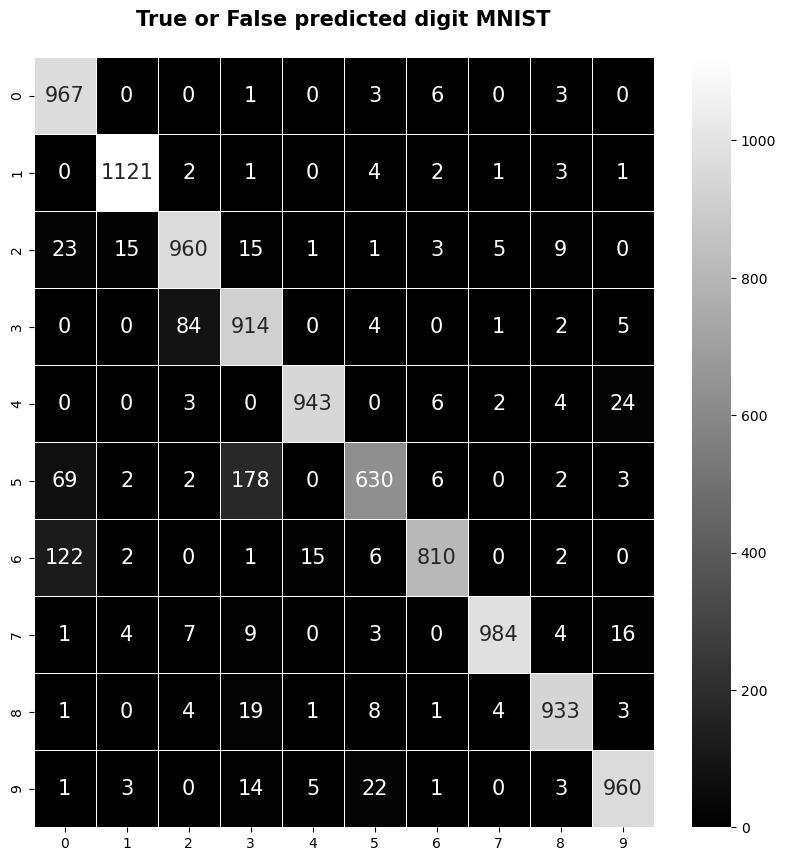

In [35]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89       980
           1       0.98      0.99      0.98      1135
           2       0.90      0.93      0.92      1032
           3       0.79      0.90      0.85      1010
           4       0.98      0.96      0.97       982
           5       0.93      0.71      0.80       892
           6       0.97      0.85      0.90       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



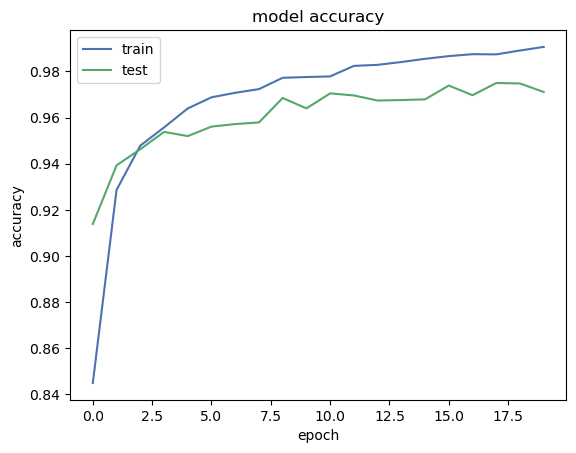

In [37]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


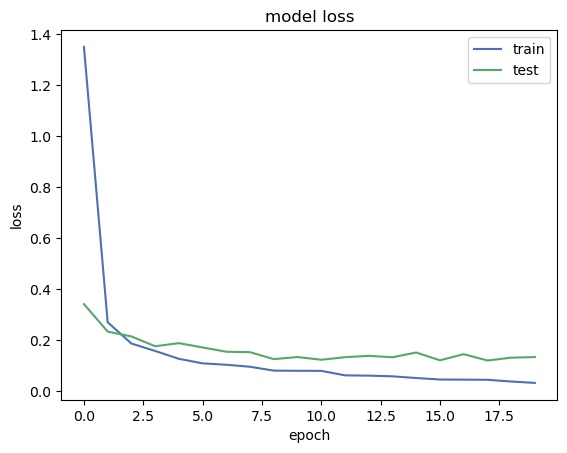

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [39]:
y_predicts

array([7, 2, 1, ..., 4, 0, 6], dtype=int64)

In [40]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

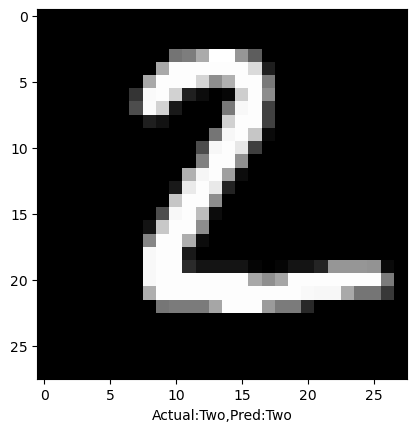

In [41]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[1].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[y_test_digit_eval[1]],col_names[y_predicts[1]]))
plt.show()

In [42]:
########### [or] #############

In [43]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[1]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


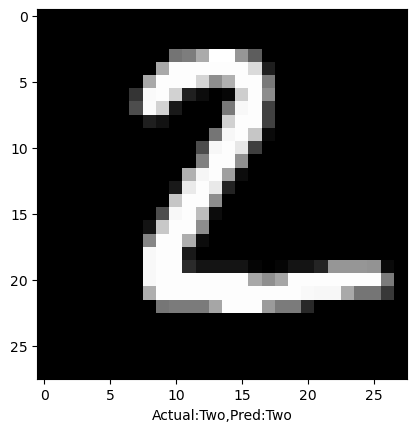

In [44]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[1].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[1])],col_names[y_predicts_single[0]]))
plt.show()